<a href="https://colab.research.google.com/github/ikiliagwuuso/Stutern-Project/blob/ikiliagwuuso-patch-1/Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import glob
import zipfile
import pandas as pd

for zip_file in glob.glob("C/folder/*.zip"):
    zf = zipfile.ZipFile(zip_file)
    dfs = [pd.read_csv(zf.open(f), header=None, sep=";") for f in zf.namelist()]
    df = pd.concat(dfs,ignore_index=True)
    print(df)

In [3]:
import glob
import pandas as pd

# get data file names
path =r'/home/rhymeinstein/Desktop/muzify'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [4]:
import os
for dirname, _, filenames in os.walk('/muzify'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
muzify = pd.read_csv ("tracks.csv")

In [6]:
muzify.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [7]:
muzify_desc = muzify.describe()

In [8]:
muzify_desc.to_csv("../muzify_desc.csv")

In [9]:
muzify_filtered = muzify[muzify.popularity >= 30]
muzify_filtered.count()

id                  109274
name                109274
popularity          109274
duration_ms         109274
explicit            109274
artists             109274
id_artists          109274
release_date        109274
danceability        109274
energy              109274
key                 109274
loudness            109274
mode                109274
speechiness         109274
acousticness        109274
instrumentalness    109274
liveness            109274
valence             109274
tempo               109274
time_signature      109274
dtype: int64

In [10]:
features = muzify_filtered.drop(["id", "artists", "explicit","mode", "popularity", "release_date", "name", "duration_ms"], axis=1)
features.head()

,id_artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
149,['5ESobCkc6JI4tIMxQttqeg'],0.614,0.0423,4.0,-12.033,0.0535,0.996,0.002930,0.183,0.211,89.822,4.0
150,"['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",0.831,0.2620,8.0,-12.386,0.0942,0.984,0.912000,0.204,0.901,104.606,4.0
151,['5ESobCkc6JI4tIMxQttqeg'],0.537,0.0443,3.0,-16.474,0.0343,0.996,0.000265,0.152,0.137,80.468,4.0
1128,['4WoGga7UeRcmjD4ufif4nG'],0.678,0.1750,3.0,-13.021,0.0301,0.969,0.001050,0.177,0.580,112.941,4.0
1129,"['4WoGga7UeRcmjD4ufif4nG', '2AXAKE1COdyXySL9LR...",0.531,0.1700,5.0,-14.500,0.0771,0.991,0.174000,0.126,0.805,165.165,4.0


In [11]:
songs = muzify_filtered[["id", "name", "artists", "explicit","mode", "popularity", "duration_ms"]]
songs = muzify.rename({"id": "song_id"}, axis="columns")
songs.head()

,song_id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [12]:
songs.count()

song_id             228069
name                228068
popularity          228069
duration_ms         228069
explicit            228069
artists             228069
id_artists          228069
release_date        228069
danceability        228068
energy              228068
key                 228068
loudness            228068
mode                228068
speechiness         228068
acousticness        228068
instrumentalness    228068
liveness            228068
valence             228068
tempo               228068
time_signature      228068
dtype: int64

In [13]:
songs.to_csv('../songs.csv', index_label='id')

In [14]:
songs_temp = songs.reset_index()

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [16]:
def get_recommendation(current_feature, threshold):
    a = np.subtract(feature_vals, current_feature)
    a = np.multiply(a, a)
    distances = np.sum(a, axis=1)
    distances = distances[distances > threshold]
    recom_list = songs_temp.song_id[np.argsort(distances)[1:4]].tolist()
    return recom_list

In [17]:
def create_recommendations(idx):
    recommendations = []
    for i in range(idx, min(idx+sample_size, feature_vals.shape[0])):
        recommendation = dict()
        recommendation['name'] = songs_temp.song_id[i]
        recommendation["neighbors"] = get_recommendation(feature_vals[i], 0.5)
        recommendations.append(recommendation)
    return recommendations

In [18]:
# cosine
def cosine_dist(u, v):
    u_l2 = np.sqrt(np.dot(np.transpose(u), u))
    v_l2 = np.sqrt(np.dot(np.transpose(v), v))
    
    numerator = np.dot(np.transpose(u), v)
    dist = np.arccos((numerator)/(u_l2*v_l2))/np.pi
    return dist

In [19]:
# euclidean
def euclidean_dist(u, v):
    a = np.subtract(u, v)
    dist = np.dot(np.transpose(a), a)
    return dist

In [20]:
def dist_2songs(feature1, feature2, metric="cosine"):
    print(metric)
    dist = -1;
    if(metric == "cosine"):
        #print("calculating cosine")
        dist = cosine_dist(feature1, feature2)
    elif(metric == "euclidean"):
        #print("calculating euclidean")
        a = np.subtract(feature1, feature2)
        dist = np.dot(np.transpose(a), a)
        
    return dist

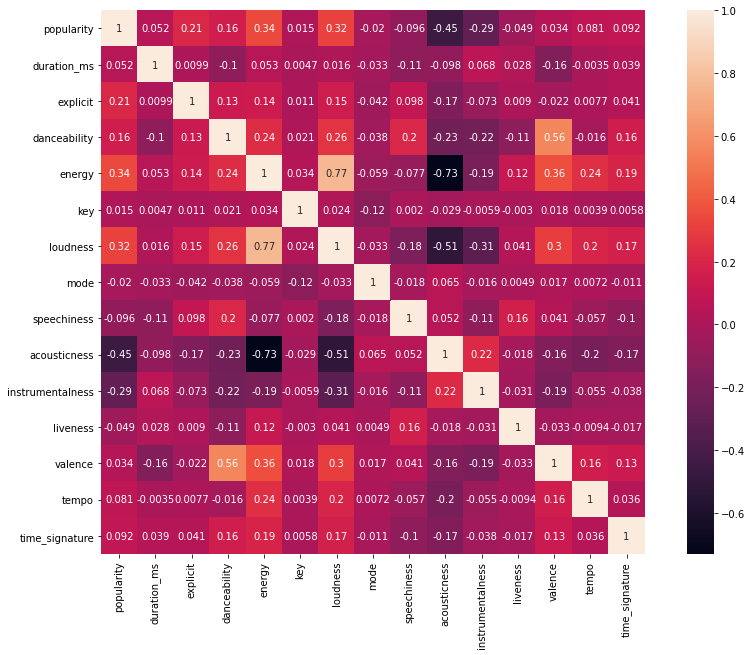

In [21]:
plt.subplots(figsize=(15, 10))
sns.heatmap(muzify.corr(), annot=True, square=True)
plt.show()

In [22]:
caya=muzify[muzify.name=='Come As You Are']
caya.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
64444,0MKGH8UMfCnq5w7nG06oM5,Come As You Are,79,218920,0,['Nirvana'],['6olE6TJLqED3rqDCT0FyPh'],1991-09-26,0.500,0.824,4.0,-5.846,0.0,0.0388,0.00016,0.00161,0.0916,0.539,120.125,4.0
64776,2RsAajgo0g7bMCHxwH3Sk0,Come As You Are,54,218920,0,['Nirvana'],['6olE6TJLqED3rqDCT0FyPh'],1991-09-26,0.500,0.824,4.0,-5.846,0.0,0.0388,0.00016,0.00161,0.0916,0.539,120.125,4.0
67523,3sYWyVGfPuit80szWXhrRA,Come As You Are,65,253907,0,['Nirvana'],['6olE6TJLqED3rqDCT0FyPh'],1994-11-01,0.683,0.766,5.0,-8.733,0.0,0.0410,0.55400,0.00346,0.0815,0.568,119.190,4.0


In [23]:
# lets see if there is missing data

def display_missing(df):    
    for col in df.columns.tolist():   
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))   
    print('\n')
    
display_missing(muzify)

id column missing values: 0
name column missing values: 1
popularity column missing values: 0
duration_ms column missing values: 0
explicit column missing values: 0
artists column missing values: 0
id_artists column missing values: 0
release_date column missing values: 0
danceability column missing values: 1
energy column missing values: 1
key column missing values: 1
loudness column missing values: 1
mode column missing values: 1
speechiness column missing values: 1
acousticness column missing values: 1
instrumentalness column missing values: 1
liveness column missing values: 1
valence column missing values: 1
tempo column missing values: 1
time_signature column missing values: 1




In [24]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
    #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
    #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
    #indeces of non-numerical columns
                if not col in [1, 6, 12, 14, 18]:
    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
    #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [25]:
recommender = SpotifyRecommender(muzify)

In [26]:
from tqdm import tqdm

In [36]:
recommender_caya = muzify_filtered

In [60]:
muzify_filtered = ('Come As You Are')

In [61]:
muzify_filtered

'Come As You Are'

In [62]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [63]:
caya=muzify[muzify=='Come As You Are']
recommender

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
149,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.614,0.0423,4.0,-12.033,1.0,0.0535,0.996,0.002930,0.1830,0.211,89.822,4.0
150,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,161933,0,"['Louis Armstrong', 'Earl Hines']","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",1923,0.831,0.2620,8.0,-12.386,1.0,0.0942,0.984,0.912000,0.2040,0.901,104.606,4.0
151,2AZgaYZSwUosJD71J2N2Zo,'Tain't Nobody's Bizness If I Do,30,206600,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.537,0.0443,3.0,-16.474,0.0,0.0343,0.996,0.000265,0.1520,0.137,80.468,4.0
1128,3XDharvL8vEyxdQwOQKmww,"On the Sunny Side of the Street (From ""Is Ever...",39,194320,0,['Tommy Dorsey'],['4WoGga7UeRcmjD4ufif4nG'],1925,0.678,0.1750,3.0,-13.021,1.0,0.0301,0.969,0.001050,0.1770,0.580,112.941,4.0
1129,47c6hVC9hL8KoAclJCVOXC,Marie,33,197787,0,"['Tommy Dorsey', 'Jack Leonard', 'Bunny Berigan']","['4WoGga7UeRcmjD4ufif4nG', '2AXAKE1COdyXySL9LR...",1925,0.531,0.1700,5.0,-14.500,1.0,0.0771,0.991,0.174000,0.1260,0.805,165.165,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228056,3SSdgcic8a3hVaPytpQsiJ,Sailing To Philadelphia,41,328907,0,"['James Taylor and Mark Knopfler', 'Mark Knopf...","['5sGiaO6GN2fJShuIzXX4NI', '0FI0kxP0BWurTz8cB8...",2000,0.607,0.4220,6.0,-11.084,0.0,0.0247,0.714,0.027600,0.1020,0.214,99.151,4.0
228059,00Vzq7Mad3a7I6uLvPzYkc,Mas Que Nada / De Manhã,34,179507,0,['Jorge Ben Jor'],['5JYtpnUKxAzXfHEYpOeeit'],2000-01-17,0.496,0.5480,2.0,-7.343,0.0,0.0304,0.670,0.000027,0.2180,0.620,88.715,4.0
228062,4smAUKNbVEVuanZFyu7snr,Chove Chuva,33,184867,0,['Jorge Ben Jor'],['5JYtpnUKxAzXfHEYpOeeit'],2000-01-17,0.737,0.3720,2.0,-10.153,0.0,0.0443,0.692,0.000000,0.0833,0.561,134.756,4.0
228063,78Mqt7lWuaxVhN0ZptsuCY,Summer Jam 2003 (DJ F.R.A.N.K.'s Summermix Short),48,231364,0,['The Underdog Project'],['06XDzzi31mBGSsaAABTZLb'],2000,0.792,0.6790,9.0,-11.243,0.0,0.1080,0.384,0.025200,0.1350,0.800,130.009,4.0
